<a href="https://colab.research.google.com/github/Naveen112001/Ml-Project/blob/master/ML-Project/Dog%20Breed%20Identification/Dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd

In [57]:
import numpy as n

In [58]:
#!unzip "drive/My Drive/Dogvision/dog-breed-identification.zip" -d "drive/My Drive/Dogvision/"

In [59]:
# End TO End Multi class Classification Project




# Note Book Overview
This Note Book consists of End to End Project based on the 
TensorFlow 2.0 Multi class Classification Project.

## 1.Project
Identifying the Breed of the Given Dog image.

## 2. Data
The Data are from  the Kaggle and Also the Link of the Data set is Provided Below:
https://www.kaggle.com/c/dog-breed-identification/data

## 3.Evaluation
 Evaluated Based on Multi Class Log Loss between the predicted probability and the observed target.
 Some Information of about the data


*   Dealing with the Image Data
*   Deep learning this was about the Unstructured data
*   There are 120 breeds of dogs this means Different Kind of classification classes
*   There around 10000+ images in training test(having labels)
*   There is areund 10000+ images in test sets(having no labels)












In [60]:
import tensorflow as tf
import tensorflow_hub as hub

In [61]:
print("Temsor Flow Version"+tf.__version__)

Temsor Flow Version2.3.0


In [62]:
try:
  %tensorflow_version 2.x
except Exception:
  pass



In [63]:
print("TensorFlow"+tf.__version__+" Tensorflowhub"+hub.__version__)

TensorFlow2.3.0 Tensorflowhub0.8.0


In [64]:
print("GPU","Availability" if tf.config.list_physical_devices("GPU") else "Not available")

GPU Availability


In [65]:
device=tf.test.gpu_device_name()
print(device)

/device:GPU:0


In [66]:
lable_csv=pd.read_csv("drive/My Drive/Dogvision/labels.csv")

In [67]:
lable_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,cb64a5454e405b6eef6061fda3433fe5,scottish_deerhound
freq,1,126


In [68]:
lable_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


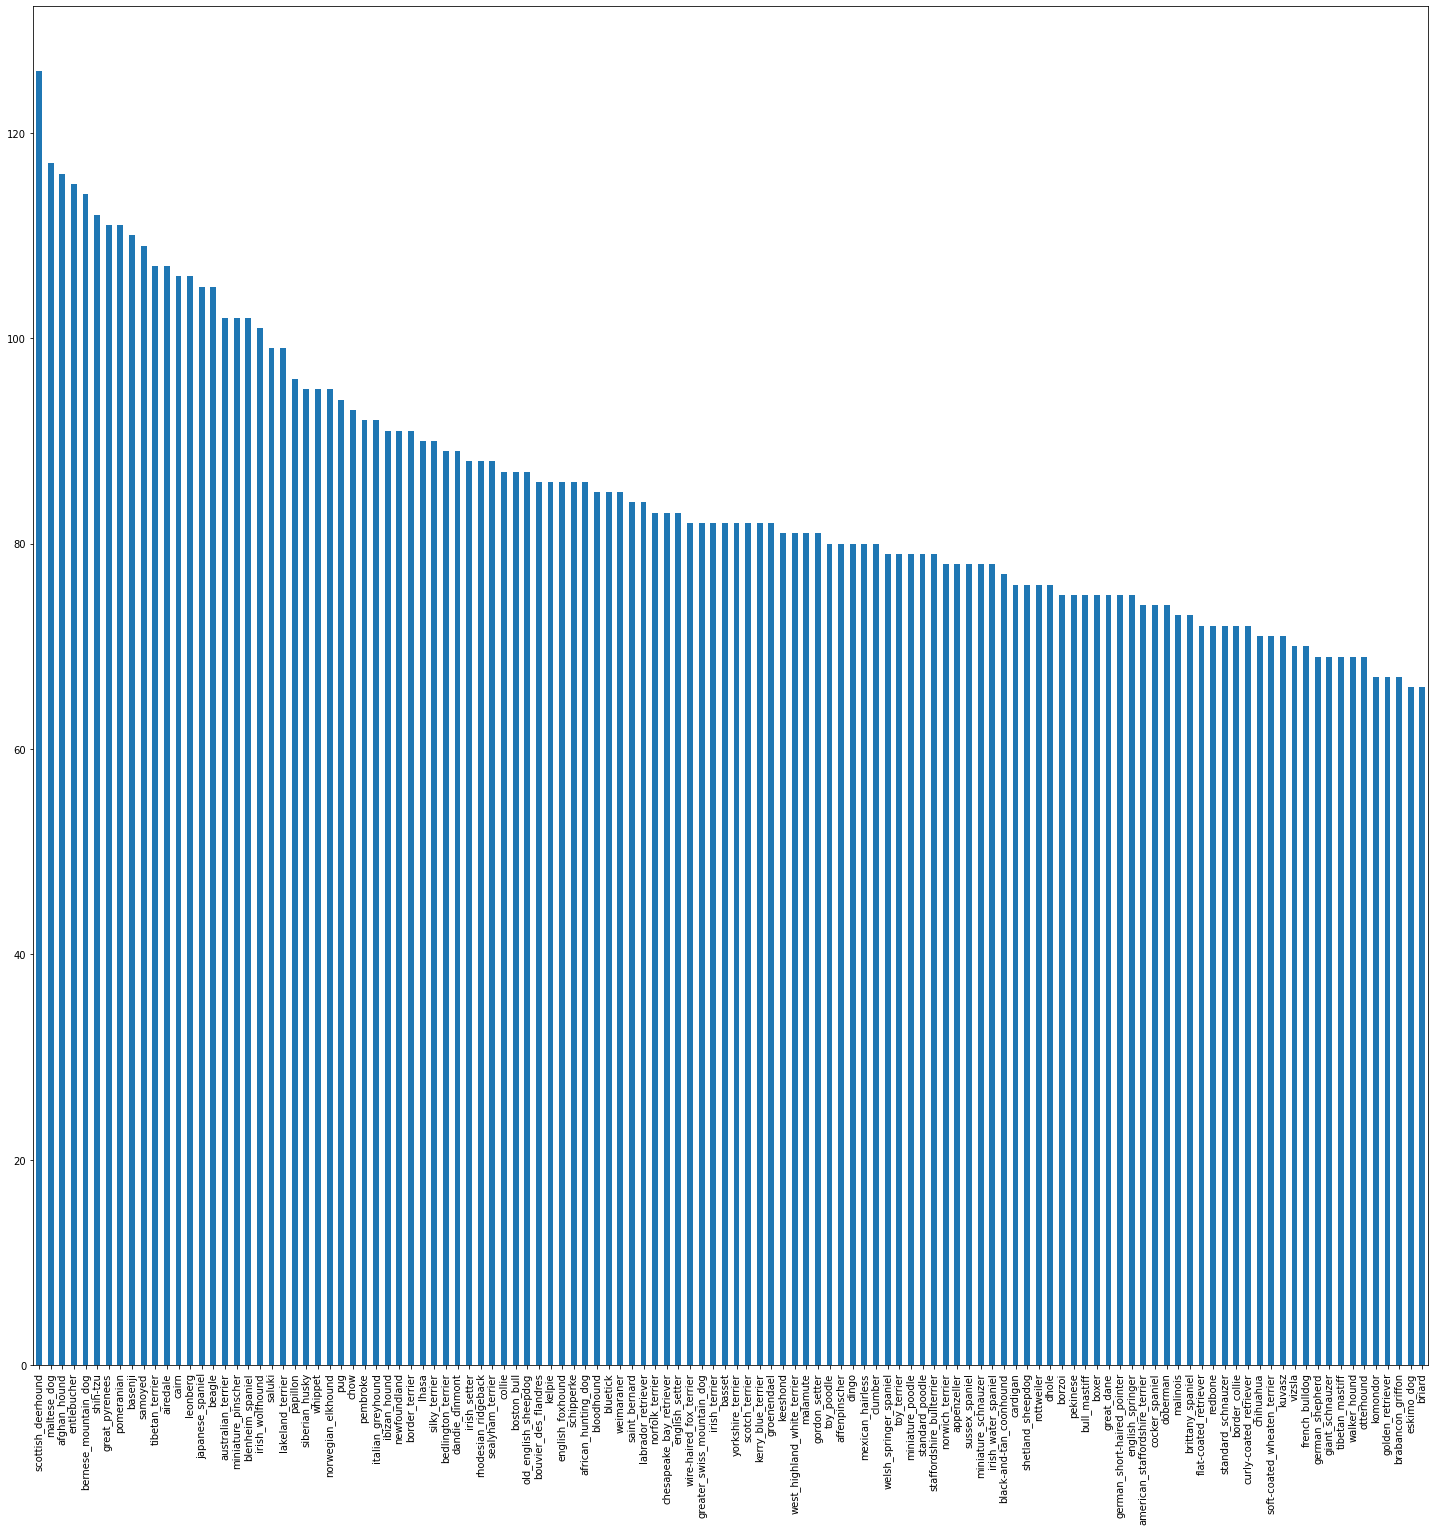

In [69]:
lable_csv["breed"].value_counts().plot.bar(figsize=(25,25));

In [70]:
lable_csv["breed"].value_counts().median()

82.0

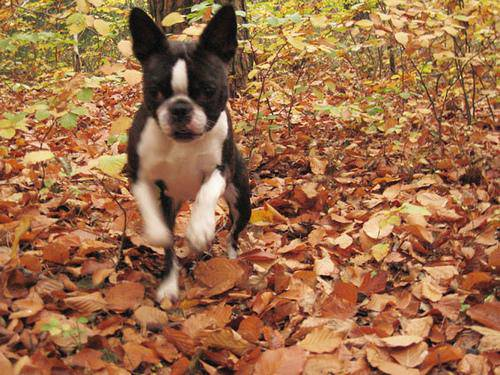

In [71]:
from IPython.display import Image
Image("drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [72]:
file_path=["drive/My Drive/Dogvision/train/"+fname+".jpg" for fname in lable_csv["id"]]

In [73]:
file_path[:10]

['drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dogvision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dogvision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dogvision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dogvision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dogvision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dogvision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dogvision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [74]:
labels=lable_csv["breed"].to_numpy()

In [75]:
unique_breeds=n.unique(labels)

In [76]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [77]:
if len(labels) == len(file_path):
  print("Number Labels matches Number of File_path")
else:
  print("Not Matching")

Number Labels matches Number of File_path


In [78]:
x=file_path

In [79]:
y=labels

In [80]:
x

['drive/My Drive/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dogvision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dogvision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dogvision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dogvision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dogvision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dogvision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dogvision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/Dogvision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/Dogvision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/Dogvision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/Dogvision/train/006cc3ddb9dc1bd827479569fcdc52d

In [81]:
len(y)

10222

In [82]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dogvision/train/")) == len(file_path):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


In [83]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [84]:
# Setup X & y variables
X = file_path
y = boolean_labels

In [85]:
len(labels)

10222

In [86]:
print(labels[0])
print(n.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [87]:
labels[0]

'boston_bull'

In [88]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


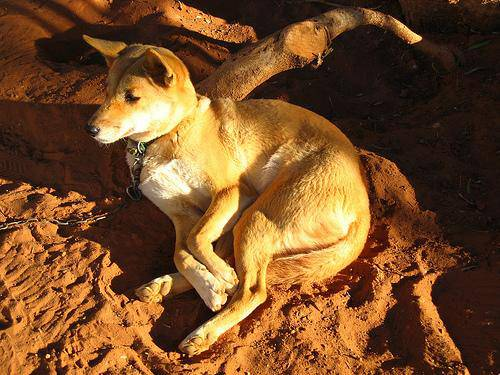

In [89]:
Image("drive/My Drive/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [90]:
NUM_IMAGES=1000 #@param {type:"slider",min:1000,max:10000}

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [92]:
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [93]:
x_train[:10]

['drive/My Drive/Dogvision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/My Drive/Dogvision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/My Drive/Dogvision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/My Drive/Dogvision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/My Drive/Dogvision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
 'drive/My Drive/Dogvision/train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
 'drive/My Drive/Dogvision/train/03e1d2ee5fd90aef036c90a9e7f81177.jpg',
 'drive/My Drive/Dogvision/train/16941a6728ddb9cb7423a6cc97fbe071.jpg',
 'drive/My Drive/Dogvision/train/0bedbecd92390ef9f4f7c8b06a629340.jpg',
 'drive/My Drive/Dogvision/train/143b9484273e57668d03bfc26755810a.jpg']

In [94]:
y_val[:2][:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

 ## PreProcessing The Images into tensors
 Turning the Images into Tensors using Function


In [95]:
from matplotlib.pyplot import imread
image=imread(file_path[42])

In [96]:
image.shape

(257, 350, 3)

In [97]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1.Take an image filepath as input

2.Use TensorFlow to read the file and save it to a variable image

3.Turn our image (a jpg) into Tensors

4.Normalize our image (convert color channel values         from    (0-255 to 0-1).
5.Resize the image to be a shape of (224, 224)

6.Return the modified image
More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [98]:
image.min(),image.max()

(0, 255)

In [99]:
Img_size=224
def process_images(file,img_size=Img_size):
  "Read file as an Image"
  image=tf.io.read_file(file)
  "Turn Numerical Tensors into Channels colors with 3 red, green,blue"
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image,size=[Img_size,Img_size])
  return image

In [100]:
#ten=tf.io.read_file(file_path[3])

In [101]:
#ten

In [102]:
#ten=tf.image.decode_jpeg(ten,channels=3)

In [103]:
#ten

In [104]:
# ten=tf.image.convert_image_dtype(ten,tf.float32)

In [105]:
#ten

In [106]:
p=process_images(file_path[2])

In [107]:
print(p)

tf.Tensor(
[[[0.3918853  0.3918853  0.36051273]
  [0.43775532 0.43775532 0.40638277]
  [0.44351017 0.44351017 0.41213763]
  ...
  [0.05796662 0.02239764 0.01937653]
  [0.05252095 0.0470589  0.04978992]
  [0.04586835 0.05371149 0.04978992]]

 [[0.38653433 0.38261276 0.3630049 ]
  [0.4161569  0.41223532 0.39262748]
  [0.43315482 0.42923325 0.4096254 ]
  ...
  [0.0909924  0.05177672 0.04754004]
  [0.03035708 0.02489503 0.02762605]
  [0.02370449 0.03154762 0.02762605]]

 [[0.36859885 0.36467728 0.34506944]
  [0.35422263 0.35030106 0.33069322]
  [0.39899355 0.39507198 0.3754641 ]
  ...
  [0.2361781  0.20233706 0.19541305]
  [0.04896353 0.04268564 0.04582458]
  [0.04459034 0.04705883 0.04582458]]

 ...

 [[0.7591447  0.75522316 0.7356153 ]
  [0.74550796 0.7415864  0.72197855]
  [0.7532336  0.74931204 0.72970414]
  ...
  [0.44312337 0.4392018  0.41959396]
  [0.4550094  0.45067993 0.4440605 ]
  [0.41266778 0.406059   0.4062775 ]]

 [[0.75528663 0.75136507 0.73175716]
  [0.7678576  0.76393604 0

In [108]:
def get_image_label(file,lable):
  image=process_images(file)
  return image,lable


In [109]:
(process_images(x[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [110]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [111]:
train_data=create_data_batches(x_train,y_train)
valid_data=create_data_batches(x_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [112]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizes the Data

In [125]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(20,20))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
   
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [114]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [116]:
train_images,train_lables=next(train_data.as_numpy_iterator())

In [118]:
len(train_images),len(train_lables)

(32, 32)

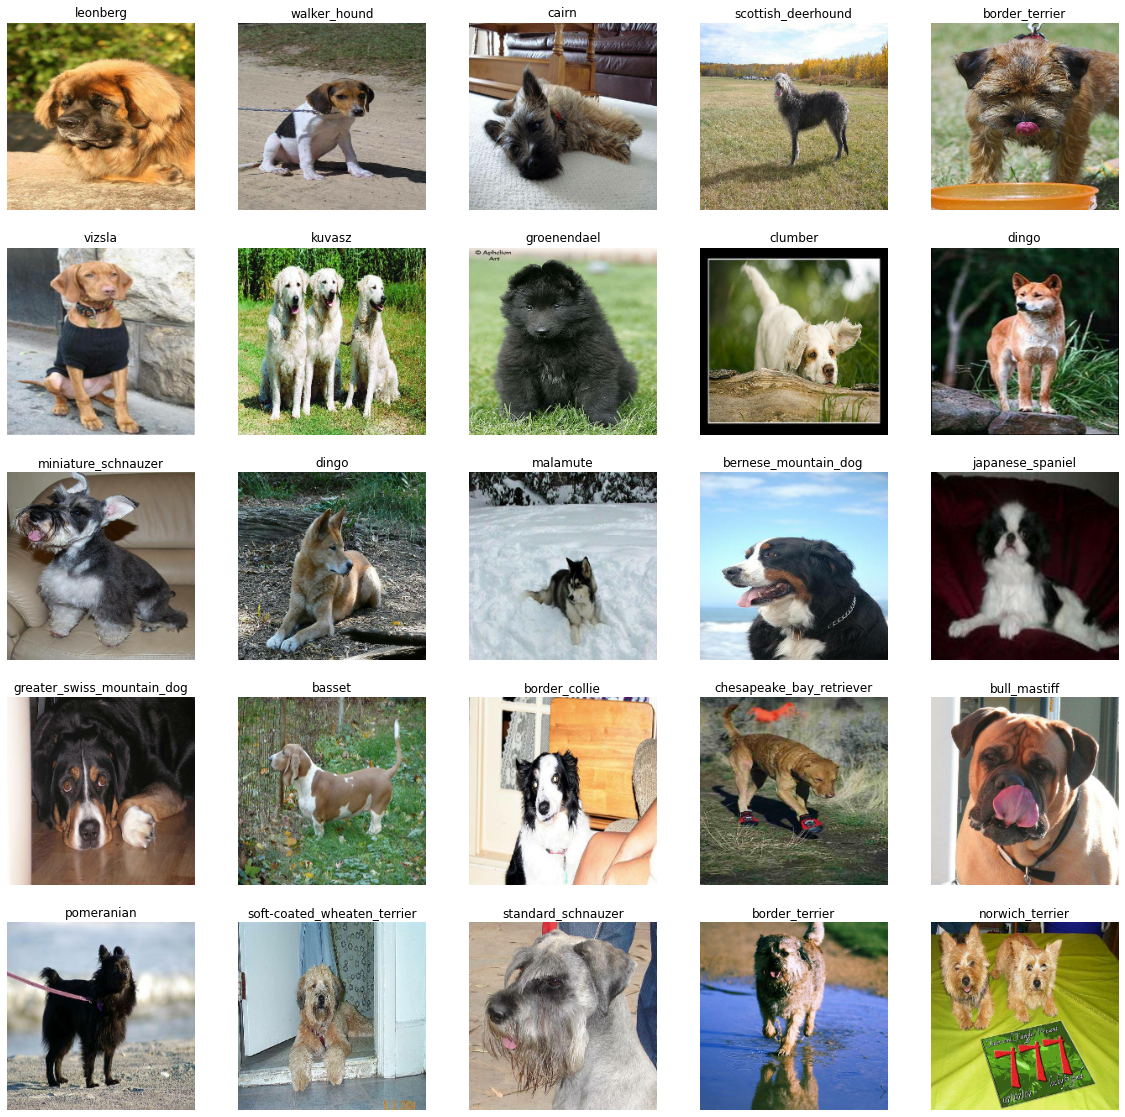

In [126]:
train_images,train_lables=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_lables)

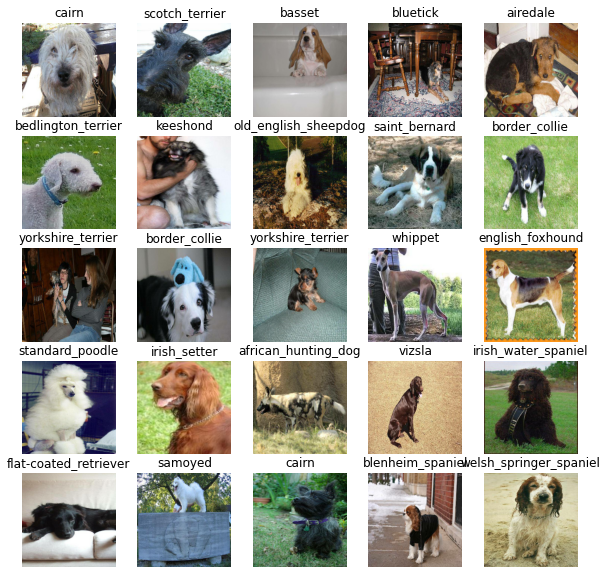

In [122]:
valid_images,valid_labele=next(valid_data.as_numpy_iterator())
show_25_images(valid_images,valid_labele)

In [130]:
Input_shape=[None,Img_size,Img_size,3]
Output_shape=len(unique_breeds)
model_url="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [141]:
def Model_creation(Input_shape=Input_shape,Output_shape=Output_shape,model_url=model_url):
  print("Building the model",model_url)
  #setip model layers
  model=tf.keras.Sequential([hub.KerasLayer(model_url),
                           tf.keras.layers.Dense(units=Output_shape,activation="softmax")
                           ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
      )
  model.build(Input_shape)
  return model

In [142]:
model=Model_creation()
model.summary()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_4 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
